In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

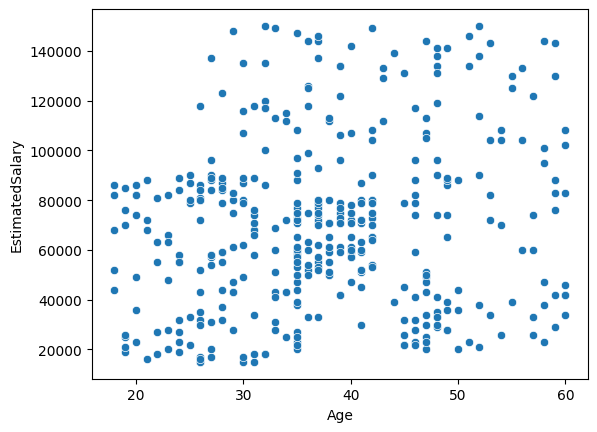

In [12]:
var=pd.read_csv("Social_Network_Ads.csv")
var=var[["Age","EstimatedSalary","Purchased"]]
sns.scatterplot(data=var,x="Age",y="EstimatedSalary")
x=var[["Age","EstimatedSalary"]]
y=var[["Purchased"]]

In [7]:
var.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
sc=StandardScaler()

In [31]:
sc.fit(x_train)
sc.fit(x_test)


,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [98]:
x_train_scaled=sc.transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=["Age","EstimatedSalary"])
x_test_scaled=sc.transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=["Age","EstimatedSalary"])

In [99]:
print("Before scaling mean & standard diviation",np.round(var.describe(),1))
print("After scaling mean & standard diviation",np.round(x_train_scaled.describe()))

Before scaling mean & standard diviation          Age  EstimatedSalary  Purchased
count  400.0            400.0      400.0
mean    37.7          69742.5        0.4
std     10.5          34097.0        0.5
min     18.0          15000.0        0.0
25%     29.8          43000.0        0.0
50%     37.0          70000.0        0.0
75%     46.0          88000.0        1.0
max     60.0         150000.0        1.0
After scaling mean & standard diviation          Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -2.0             -2.0
25%     -1.0             -1.0
50%     -0.0              0.0
75%      1.0              1.0
max      2.0              2.0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

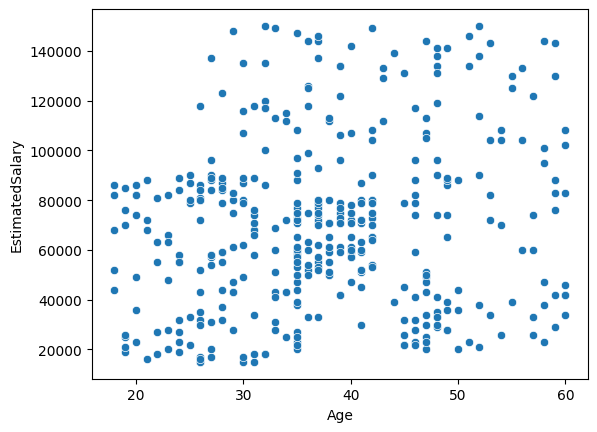

In [100]:
sns.scatterplot(data=var,x="Age",y="EstimatedSalary")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

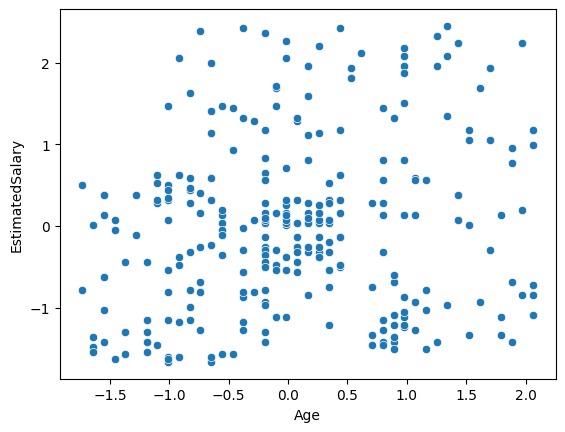

In [51]:
sns.scatterplot(data=x_train_scaled,x="Age",y="EstimatedSalary")

In [101]:
#now make preition for accuracy:
lr=LogisticRegression()

In [102]:
lr.fit(x_train_scaled,y_train)

C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [103]:
y_pred=lr.predict(x_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [104]:
check_accuracy=accuracy_score(y_pred,y_test)
print(check_accuracy)

0.8666666666666667


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

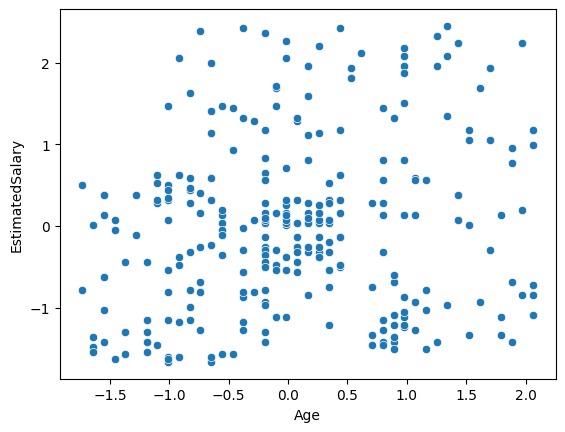

In [105]:
sns.scatterplot(data=x_train_scaled,x="Age",y="EstimatedSalary")

In [106]:
np.round(x_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0
